# 01. Введение в Haskell

<div style="text-align: right"> 
    
    Лекция 1.1 04/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## 01.0 Литература

1. М. Липовача. Изучай Haskell во имя добра! Издательство: ДМК Пресс, 2012
2. А. Кубенский. Функциональное программирование. М.: Юрайт, 2019.

**Дополнительная**

1. А. Филд, П. Харрисон. Функциональное программирование. М.: Мир, 1993.
2. П. Хендерсон. Функциональное программирование. Применение и реализация. М.: Мир, 1983.
3. Пол Хьюдак, Джон Петерсон, Джозеф Фасел. Мягкое введение в Haskell. RSDN Magazin, 2006 № 4 и 2007 № - (http://rsdn.ru/article/haskell/haskell_part1.xml,  http://rsdn.ru/article/haskell/haskell_part2.xml)

4. Р. В. Душкин Функциональное программирование на языке Haskell (+ CD-ROM) Издательство: ДМК Пресс, 2007 г., Мягкая обложка, 608 стр.
5. https://www.haskell.org/documentation/

6. [Haskell Jupyter](https://github.com/gibiansky/IHaskell)

## 01.1 Отличия функциональого стиля программирования от процедурного

В обычном программировании (архитектуре Фон Неймана) предполагается последовательное исполнение инструкций. Соответственно, и все языки программирования, с самого начала ориентировались на данное программирование с изменением переменных:

- есть арифметические и логические операции
- есть операции присваивания, позволяющие менять значения переменных, лежащих в памяти
- алгоритм состоит из последовательных шагов, которые исполняются в строгой последовательности
- появились управляющие конструкции, контолирующие последовательность событий программы
- появилис функции и процедуры, позволяющие выполнять какие-то связанные куски
- модули, исключительные структуры (try/catch), структуры данных и ООП

Все это оставалось последовательным программированием с присваиванием. Программа представляла из себя либо алгоритм, либо некоторый ящик.

Функциональное программирование *не предполагает* строго исполнения чего-либо, значит возможно распараллеливание, но запрещаются некоторые вполне привичные вещи, такие как *присваивание*, так как это предполагает, что в одной переменной в определенный момент времени находится одно значение, а в другой момент времени - другое.

Если наша последовательность действий определяется тем, что можно сделать, а что нельзя и данный отказ дает **очень большие возможности для распараллеливания** - в функциональном программировании нет некоторого `side-effect`. Если что-то можно сделать параллельно, то это и нужно сделать параллельно.

Стиль программирования, основанный на архитектуре фон Неймана, имеет ряд недостатков, особенно в современных условиях, когда добиться улучшения производительности процессоров почти невозможно без увеличения числа «ядер» – независимо работающих процессоров.

Отсюда:
- Параллельное вычисление независимых значений крайне затруднено; необходимо использовать специальные средства «распараллеливания и синхронизации».
- Поскольку функции обладают свойством менять внешний контекст («side effect»), то работа с функциональными объектами ограничена.

При использовании функционального стиля мы отказываемся от переменных в классическом понимании. Функции становятся «чистыми», описанные выше проблемы исчезают, возникают некоторые дополнительные преимущества, которые мы обсудим позже, то есть функции *не могут изменить* внешний контекст. Функции работают только **со своими локальными данными**, а поэтому их часто можно называть *переменными*.

**Недостатки и проблемы использования функционального стиля программирования:**

- Невозможно использовать такой важный (и очень привычный!) инструмент программирования, как циклы. Для сложных повторяющихся конструкций используются `рекурсивные функции`.

- В реальной жизни невозможно отказаться от «изменения среды», хотя бы при вводе-выводе. Это влечет за собой необходимость жесткого разделения `«функционального»` (*неизменяемого*) и `«процедурного»` (*изменяемого*) миров в реально работающих программах и системах.

## 01.2 История создания *Haskell*

- начало `1930-х: Church`, формализация функций в λ-исчислении
- `1960: John McCarthy, LISP` – первый функциональный язык программирования
- `1978: John Backus, FP` – система комбинаторного программирования
- конец `1970-х: Edinburgh univ., ML` – meta-language
- `1985-1986: David Turner, Miranda` – функциональный язык с «ленивыми» вычислениями
- `1990: Ericsson, Erlang` – «коммерческий» функциональный язык
- `1988: Paul Hudak, Haskell` – первая версия языка `Haskell`
- `1999: Haskell group, Haskell’98` – «стандартная» версия языка `Haskell`

## 01.3 Типы данных и базовые конструкции языка *Haskell*

Язык является сторого типизированным и все объекты имеют определённый *тип данных*, но тип не обязаны объявлять **явно** - это тип выводится из контекста. Мы имеем возможность определять явно - для функций рекомендуется *явно* объявлять тип (когда допускается ошибка, то гораздо легче обнаружить её на ранней стадии из-за несоответствия типов).

Немножечко потренируемся.

In [6]:
2 + 2

4

In [12]:
let a = 4 -- это не присваивание, а обозначение для значения
-- let a = a + 1 приведёт к ошибке!
-- a - идентификатор обозначает новое значение 4

In [11]:
a*a

16

Информация о типах задаётся следующей командой.

- `:t` (type) - тип объекта
- `:help` - help

In [14]:
:t 2

2 :: forall p. Num p => p

In [15]:
:t a

a :: forall p. Num p => p

Данная запись возникает из-за того, что число может трактоваться по-разному.

Можно задать переменную типа `Integer`.

In [23]:
let nn = 2 :: Integer

In [24]:
:t nn

nn :: Integer

## 01.4 Типы данных

- `Integer` - больше всего похоже на `BigInteger` - неограниченные целые, если памяти хватает для размещения данного числа, то оно будет размещено
- `Int` - короткие целые значения, помещающиеся в слово

Во многих функциях результат имеет вид `Integer`, а не `Int`.

- `Float` - вещественные значения
- `Double` - вещественные значения

- `Char` - символьные значения (особые значения, в отличии от Java или C, где они являются целыми). (`'A', '*','4'`)
- `Bool` (Boolean в других языках) - логические значения (True, False).

**Важно**: все идентификаторы зависят от того, в каком регистре написаны символы. *Все типы, стандартные типы и нестандартные типы* должны быть с заглавных букв.

Если значения обозначены идентификаторами, то они должны быть тоже с *заглавной буквы*. Переменные обозначаются *строчными буквами*.

Идентификаторы: `fact, fActOrial, fact_1, fact''`. Апостроф - обозначает вспомогательные функции.

- знаки операций - `+, -, *, <, ==`

Идентификаторы применяются для обозначения констант - значений разных типов (простых, составных функций) и типов. Любому идентификатору можно сопоставить тип и значение.

Значения могут быть более сложными, составленными из других значений - так называемых **конструкторов** - способ сделать составное значение из простых. Функция - простое значение.

In [26]:
school :: Integer --идентификатору сопоставляется тип
school = 239 -- значение

In [27]:
school

239

Если идентификатору не был назначен тип, то тип будет выведен в дальнейшем в зависимости от того, что мы обозначаем.

In [28]:
piHalf :: Double
piHalf = 3.1415926536 / 2

In [29]:
piHalf

1.5707963268

**Кортеж**

Значения могут объединяться в более сложные с помощью кортежирования.

Например:

In [37]:
pair :: (Double, Double)
pair = (2.7, 3.14)

Кортежа из одного элемента не существует!

In [41]:
p = (2)

Line 1: Redundant bracket
Found:
(2)
Why not:
2

In [42]:
attributes :: (Char, (Int, Int, Int), Bool)
attributes = ('M', (17, 4, 1955), True)

In [45]:
:type attributes

attributes :: (Char, (Int, Int, Int), Bool)

In [46]:
p = (2.5, ) -- нельзя

: 

Тип функции определяется типами аргументов и результата, например:

In [68]:
sin :: Double -> Double -- аргумент и результат типа Double
plusInt :: Int -> Int -> Int -- два аргумента типа Int, результат Int
divMoid :: (Int, Int) -> (Int, Int) --аргумент и результат - кортежи

: 

Выражения составляются из констант применением операций и функций. Функции применяются к аргументу, идентификатор функции отделяется от идентификаторов аргументов пробелом. Пробел - применение функции к аргументу (тоже операция).

*Применение функции к аргументу* - **наивысшая** по приоритету операция.

In [76]:
result = sin(3.1416 / 4) - 2.5
result

-1.7928919201405265

```haskell
pair = divMod(1458, plusInt 176 192)
```

In [79]:
result = sin $ 3.1416 / 4 - 2.5
result

-0.989678057907231

Операции и функции отличаются только формой записи. Следующие выражения эквивалентны:

In [84]:
3 + 8

11

In [85]:
(+) 3 8

11

Если хотим применить операцию функции (плюс), то функцию необходимо вынести в скобки.

In [87]:
27 `div` 4 -- бинарная операция, символ - обратые опострафы, где Ё
-- данный вид называется префиксным

6

In [88]:
div 27 4 -- инфиксный вид

6

In [95]:
2 `negate` 3

: 

## 01.5 Определение функций с помощью уравнений

Уравнения задают правила, по которым происходит вычисление функции, то есть каким образом результат получается из аргументов функции.

Слева мы пишем **образцы** (ввод чисел a и b, например).

In [104]:
plusInt :: Int -> Int -> Int
plusInt a b = a + b

In [98]:
plusInt 4 5

9

In [117]:
divMode :: (Int, Int) -> (Int, Int)
divMode :: (a, b) = (a `div` b, a `mod` b)

: 

В образце можем отдельным идентифакотором обозначить обе части

In [114]:
:{
    plusInt :: Int -> Int -> Int
    plusInt a b = a + b
:}

: 

: 

Эти определения можно было записать в отдельный файл с расширением `.hs` и загрузить данный модуль. Когда функций становится много, то запись становится всё сложнее.

Уравнения могут содержать
- условные выражения. `if` - не условный оператор, а средство выбора выражения - `тернарный оператор ?:` - в зависимости от условия выбирается выражение
- рекурсивные обращения

Отступы важны - все независимые друг от друга конструкции должны записывать с одной и той же конструкции. Всё, что записывается вправо - будет считаться продолжением конструкции.

**Функция для факториала**

In [125]:
factorial :: Integer -> Integer
factorial n = if n == 0 then 1 
                        else n * factorial (n-1)

In [126]:
factorial 5

120

**Сумма n чисел**

In [131]:
sums :: Integer -> Integer
sums n = n + if n == 0 then 0 
                       else sums(n-1)

In [133]:
sums 6

21

In [134]:
module test where

: 

In [145]:
:load "Test.hs"

: 

In [146]:
factorial 10

3628800

In [147]:
factorial 100

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

## 01.6 **Условные уравнения**

Используются сторожи (`guards` |)

In [152]:
factorial1 :: Integer -> Integer
factorial1 n | n == 0 = 1 -- если равно нулю, то единица
            | n > 0  = n * factorial1(n-1)

In [153]:
factorial1 100

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [156]:
factorial1 (-10) -- не нашлось подходящего образца, 
-- не нашли сторожа подходящего

: 

Заметим, что в данном варианте будет выдано сообщение об ошибке при отрицательном значении, а в предыдущем - зациклится.

- `:r` - команда reload в интерпретаторе
- `:load "test.hs"` - загрузка модуля

Уравнение для одной функции может быть несколько, тогда аргументы последовательно *сопоставляются с образцами*, в котором **важна последовательность** сопоставления образцам. При отрицательном аргументе снова зациклимся.

In [159]:
factorial2 :: Integer -> Integer
factorial2 0 = 1
factorial2 n = n * factorial2(n-1)

In [160]:
factorial2 10

3628800

## 01.7 Подготовка и запуск программ

### 01.7.1 Краткий синтаксис

В лекциях всюду используется «краткий» синтаксис, при котором каждое новое определение начинается с новой строки. Этот синтаксис очень чувствителен к расположению строк. Каждое новое «предложение» должно начинаться ровно в той же позиции, что и предыдущее.

Если требуется разместить «предложение» на нескольких строках, то «продолжения» должны начинаться с отступом от позиции предыдущей строки

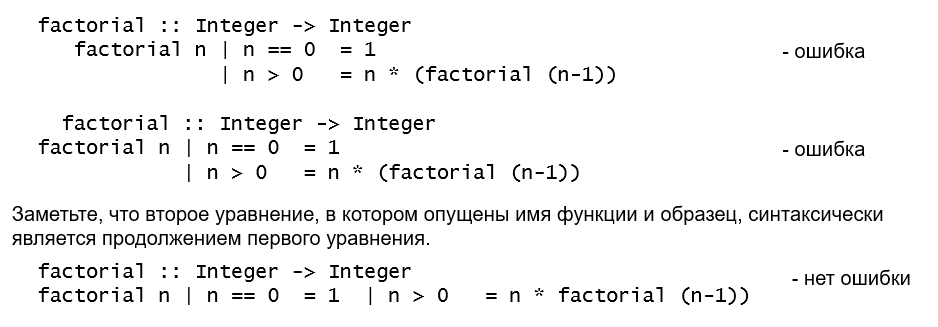

### 01.7.2 Полный синтаксис

«Полный» синтаксис подразумевает, что последовательность «предложений» заключается в фигурные скобки, а отдельные предложения отделяются друг от друга точками с запятой. В случае использования «полного» синтаксиса соблюдать отступы не обязательно.

Можно писать как угодно с отступами, если использовать скобки

In [162]:
{ factorial :: Integer -> Integer;
     factorial n | n == 0  = 1
               | n > 0   =
n * (factorial (n-1)) }

: 

: 

В программе можно смешивать полный и краткий синтаксис. Анализатор переключается между ними по следующим правилам:

- анализ начинается в режиме полного синтаксиса;
- если там, где нужна открывающая фигурная скобка, ее нет, то она автоматически вставляется, а анализатор переходит в режим краткого синтаксиса;
- если в режиме краткого синтаксиса очередная строка начинается с той же позиции, что и начало всего предложения, то перед ней автоматически вставляется точка с запятой;
- если очередная строка начинается с отступом влево от начала текущего предложения, то вставляется закрывающая фигурная скобка;
- если очередная строка начинается с отступом вправо, то это – продолжение предыдущей строки (ничего не вставляется)

## 01.8 Исполнение программ с помощью текстовой подстановки

Пусть есть следующая программа.

In [163]:
factorial1 :: Integer -> Integer
factorial1 n | n == 0 = 1 -- если равно нулю, то единица
            | n > 0  = n * factorial1(n-1)

Можно считать, что вычисление происходит в качестве **текстовой подстановки** - ищем тот случай, когда подходит для образец.

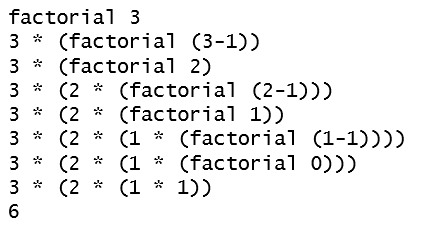

Данный метод называется *редукцией* - мы подставляем в выражения то, что на самом деле определено в нашем уравненях. В конце концов мы пришли к выражению, которое не *редуцируется* - пришли к **нормальной формы** (в $\lambda$-исчислении), которое можно представить в текстовом виде.

## 01.9 Несколько определений простых арифметических функций


**Вычисление наибольшего общего делителя двух натуральных чисел**

- `error` - по существу у этой функции нет результата, она прерывает программу, выдавая сообщение - используется для дебага.

In [166]:
-- Вычисление наибольшего общего делителя двух натуральных чисел
gcd              :: Integer -> Integer -> Integer -- определяю тип
gcd m n | m < n  =  gcd n m  -- переставляю элементы
        | n < 0  =  error "gcd: Wrong argument" -- исключение
gcd m 0          =  m 
gcd m n          =  gcd n (m `mod` n) 

In [165]:
gcd 10 6

2

**Проверка заданного натурального числа на простоту**

Будем пользоваться вспомогательной функцией, так как рекурсию удобно сделать, если есть два аргумента. Мы бы ввели переменную - делитель - и увеличивали бы, пока не обнаружили бы, что число простое.

Но данную переменную ввести никак невозможно в функциональном программировании, поэтому вводится дополнительная переменная `d`.

- `otherwise` - в противном случае - *если ни один сторож не подошёл*

In [167]:
-- Проверка заданного натурального числа на простоту

-- d - делитель
-- p - число
prime             :: Integer -> Bool 
prime'            :: Integer -> Integer -> Bool 
prime p    | p <= 0          =  error "prime: Non-positive argument"
           | otherwise       =  prime' 2 p -- вводим подобие локальной переменной
prime' d p | d * d > p       =  True
           | p `mod` d == 0  =  False -- если разделилось, то число не простое
           | otherwise       =  prime' (d+1) p -- рекурсивный вызов

Такие аргументы, как `d` называют **накапливающими аргументами** (увеличивают свое значение).

## 01.10 Немного о явных и неявных преобразованиях типов

Язык `Haskell` – строго типизированный. Это означает, что во время *компиляции* **тип** любого выражения **известен и контролируется** (синтаксически). Если есть несоответствие типов, то программа просто не скомпилируется. Тем не менее, многие функции и операции допускают в качестве аргументов (операндов) значения разных типов.

- Сложение целых

In [170]:
2 + 5 -- сложение целых, будет точно целым

7

- Сложение вещественных чисел

In [172]:
2.5 + 3.5 --результат - вещественная 6

6.0

- Вещественное и целое - запись `2 + 3.5` двойка будет представлена в качестве вещественной двойки. Преобразования типов не происходит.

In [174]:
2 + 3.5 -- сложение вещественных (первый операнд рассматривается как вещественное);


5.5

- сложение вещественных (тип первого операнда выводится как вещественное)

In [176]:
let n = 2 in n + 3.5 -- опять производится вывод типов

5.5

In [178]:
let n = 2 :: Int in n + 3.5 -- видим, что нет операций, которое бы сложило
-- целое число и вещественное 
       -- ошибка (тип первого операнда явно указан как целый);

: 

Это показывает, что **неявных** преобразований в *Haskell* **нет**. Правда можно написать функцию `fromIntegral` - преобразует целое число в то, что **нужно по контексту**

In [179]:
let n = 2 :: Int in fromIntegral n + 3.5
-- сложение вещественных (тип первого операнда явно преобразован);

5.5

Неявных преобразований из `Int` в `Integer`, об этом будет сообщать компилятор, поэтому используем функции преобразования по контексту:

In [180]:
let { a = 2 :: Int; b = 12 :: Integer } in a + b
-- ошибка (операнды имеют разные типы);

: 

In [182]:
let { a = 2 :: Int; b = 12 :: Integer } in a + fromIntegral b 
    -- сложение коротких целых;

14

**Функции преобразования типов**:

- `fromIntegral`
- `fromRational`
- `fromEnum`
- `toInteger` - значение другого типа в `Integer`
- `toRational` - обобщённый вещественный тип
- `truncate` (ближайшее целое)
- `round` (округление)
- `ceiling` (вверх)
- `floor` (вниз

## 01.11 Эффективность рекурсивных функций. Концевая рекурсия

Вычислим числа Фибоначчи

In [183]:
-- Вычисление числа Фибоначчи, заданного порядковым номером
fib        :: Integer -> Integer
fib 1      =  1
fib 2      =  1
fib n      =  fib (n-1) + fib (n-2)

In [184]:
fib 6

8

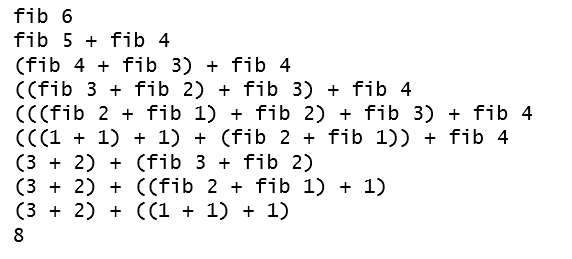

Очень долго - введём дополнительные переменные.

In [185]:
-- k номер очередного числа Фибоначчи
-- fk - k-e число Фибоначчи 
-- fk1 - k-1-e число Фибоначчи
fib   :: Integer -> Integer
fib'  :: Integer -> Integer -> Integer -> Integer -> Integer
fib'  n k fk fk1 | k == n  =  fk
                 | k < n   =  fib' n (k+1) (fk+fk1) fk  
fib 1 = 1
fib n = fib' n 2 1 1

In [187]:
fib 6

8

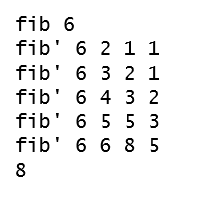

Используется **концевая рекурсия** - рекурсивный вызов - **последняя операция** в правой части уравнения. Некоторые компиляторы могут увидеть, что рекурсия концевая (которая не всегда выгодна, растёт стек вызовов), поэтому фактически концевая рекурсия - цикл и компилятор может распознать концевую рекурсию и сделать гораздо более вычислительно быстрее.

In [191]:
-- f - вычисленное значение факториала
-- n - сколько осталось вычислить

factorial  :: Integer -> Integer
factorial' :: Integer -> Integer -> Integer
factorial n = factorial' n 1               -- (factorial' n f) == (f * n!)
factorial' n f | n == 0  =  f
               | n > 0   =  factorial' (n-1) (n*f)

In [190]:
factorial 100

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

Сама форма остаётся той же самой, и концевую рекурсию можно легко преобразовать в цикл вычислений.

Еще раз обратим внимание, что переменных нет и нет локальных изменений - функции чистые и переменная не может измениться.